We get K = 5.79092544867531, with error = 0.13057031425857973
We get r = 0.002994981560465673, with error = 9.277116974089096e-05


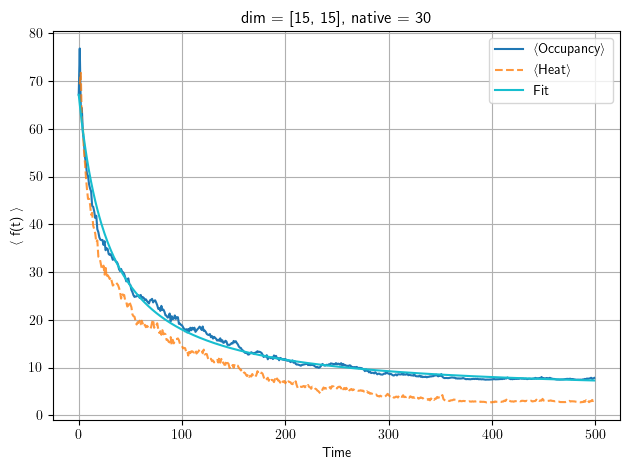

Plot Saved!
We get K = 5.282432824913323, with error = 0.22204780331353036
We get r = 0.0027157371122667573, with error = 0.0001479085698612729


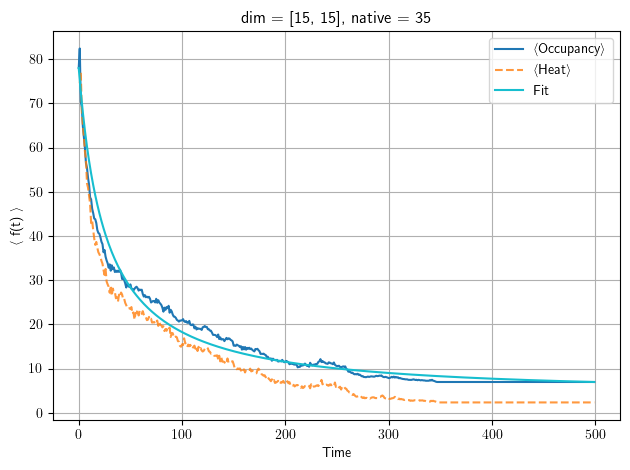

Plot Saved!
We get K = 7.021614928407761, with error = 0.1430836906406297
We get r = 0.00503030420615563, with error = 0.0001499462854355091


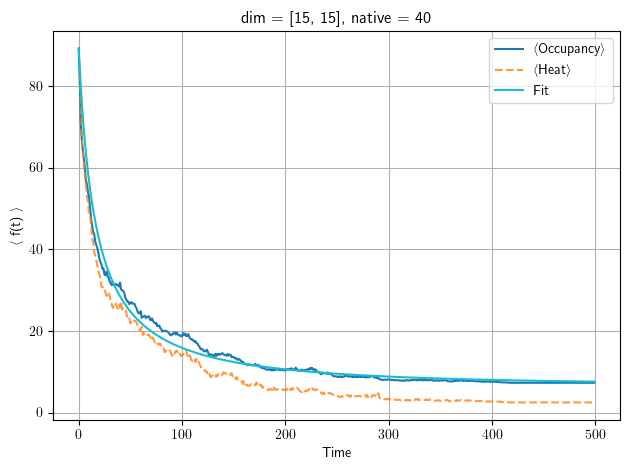

Plot Saved!
We get K = 9.435231603232298, with error = 0.2986470590229948
We get r = 0.00943355676036812, with error = 0.0005119787697149727


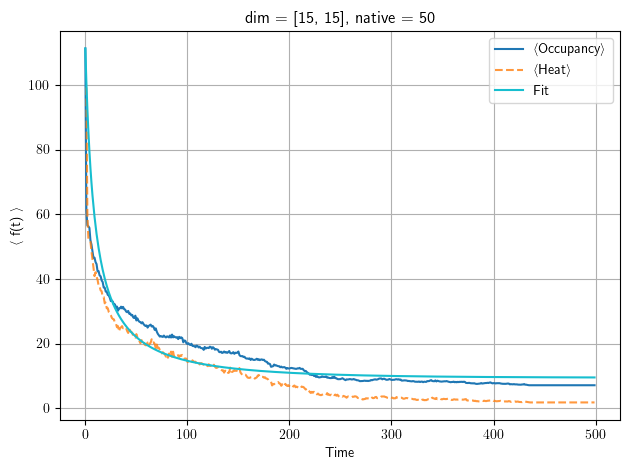

Plot Saved!
We get K = 10.635970240771679, with error = 0.2905102396075223
We get r = 0.07319900751641044, with error = 0.007053923648618082


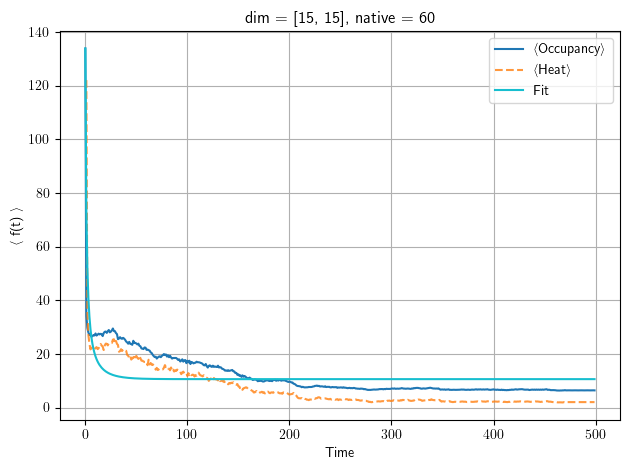

Plot Saved!
[15, 15]
We get K = 36.02084138508439, with error = 0.6590224533652725
We get r = 0.004395359116719742, with error = 0.00013290285245803256


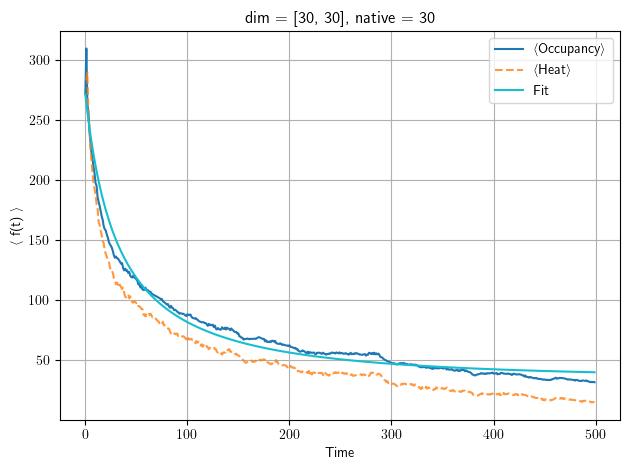

Plot Saved!
We get K = 49.58845174933962, with error = 0.5486147101835936
We get r = 0.007969603302362774, with error = 0.00018402250470051185


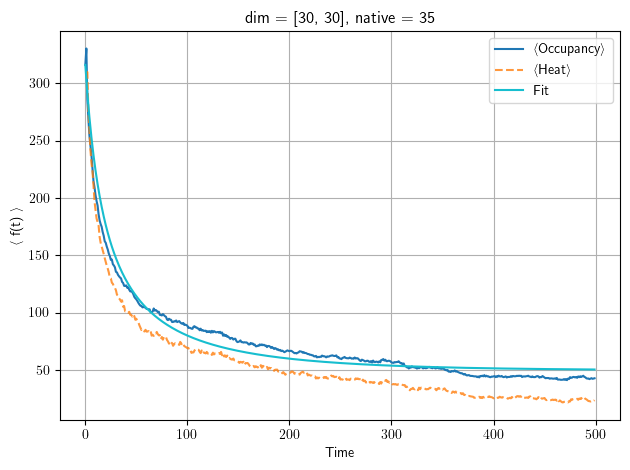

Plot Saved!
We get K = 50.715362942975624, with error = 0.601443420711539
We get r = 0.009637180698542925, with error = 0.00024161736040237517


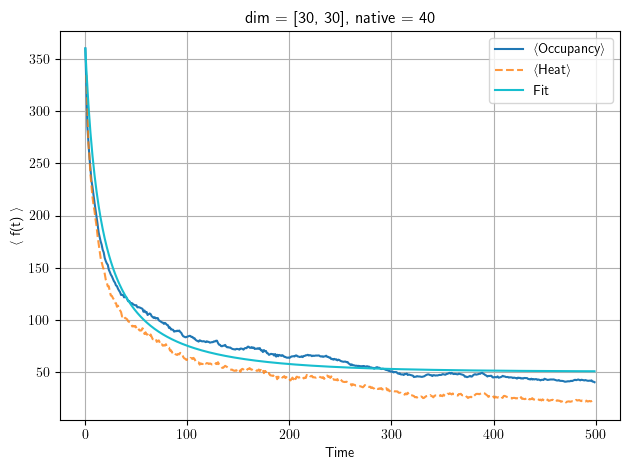

Plot Saved!
We get K = 58.38631872246689, with error = 0.8900684626584008
We get r = 0.017927123288902825, with error = 0.0006942635415700093


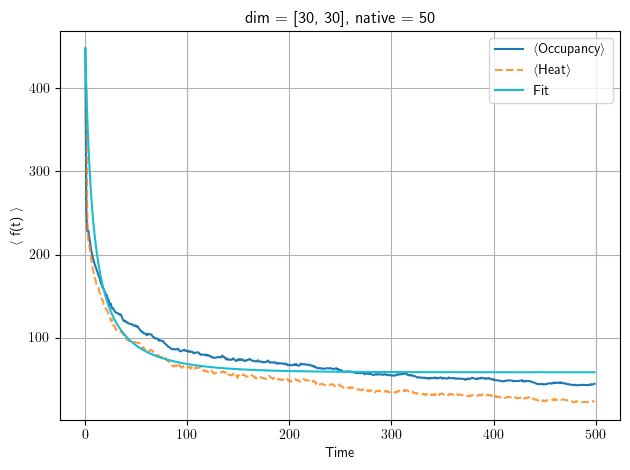

Plot Saved!
We get K = 60.92119298072145, with error = 0.8456138781427287
We get r = 0.2095299841130649, with error = 0.02187164507402446


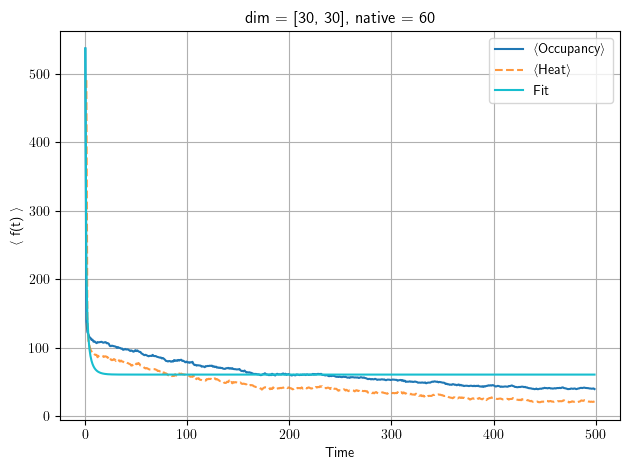

Plot Saved!
[30, 30]


In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import ast
from scipy.optimize import curve_fit

# Logistic regression of populations
def f2(x, K, r):
    x0 = df_res['occupancy'].iloc[0]
    return (K*x0*np.exp(r*x))/(K+x0*(np.exp(x*r)-1))

f2v = np.vectorize(f2)

def consecutive(data, stepsize=1):    
    return np.split(data, np.where(np.diff(data) != stepsize)[0]+1)

folder_name = 'data_old/'
all_dim = [[i, i] for i in [15, 30]]    
all_seed = list(range(100, 201)) 
all_native = [30, 35, 40, 50, 60]
graph = True
iterations = 500
list_iterations = list(range(iterations))      # This is useful when decomposing the dataframe

patterns = ['block', 'bee_hive', 'loaf', 'boat', 'tub', 'blinker', 'toad', 'beacon', 'pulsar', 'glider']
others = ['heat', 'occupancy']
columns = patterns + others

# Analysis of occupancies and heats
K, r, K_err, r_err = [], [], [], []
for dim in all_dim:
    for native in all_native:
        df = pd.DataFrame(columns=columns)
        for seed in all_seed:
            file_name = folder_name+str(dim[0])+"_"+str(dim[1])+"/"+str(native)+"_"+str(seed)+'.csv'
            if os.path.isfile(file_name):
                df_tmp = pd.read_csv(file_name, sep=';', skiprows=[0], names=columns, header=None)
                for col in df_tmp.columns:
                    df_tmp[col] = df_tmp[col].apply(lambda x: ast.literal_eval(str(x)))
                df = pd.concat([df, df_tmp], ignore_index=True)
        
        n = len(all_seed)
        df_per_native = df[others]
        df_res = pd.DataFrame([((lambda z: df_per_native.loc[z:df.shape[0]:iterations])(z)).mean() for z in list_iterations])     # In this way we average on same time for different seeds
        if graph:
            popt, pcov = curve_fit(f2, list_iterations, df_res['occupancy'])
            print(f"We get K = {popt[0]}, with error = {np.sqrt(pcov[0][0])}")
            K.append(popt[0])
            K_err.append(np.sqrt(pcov[0][0]))
            print(f"We get r = {popt[1]}, with error = {np.sqrt(pcov[1][1])}")
            r.append(popt[1])
            r_err.append(np.sqrt(pcov[1][1]))
            plt.rcParams['text.usetex'] = True
            plt.title(f"dim = {dim}, native = {native}")
            plt.plot(df_res['occupancy'], label=r'$\langle$Occupancy$\rangle$', color='tab:blue')
            plt.plot(list_iterations[1:], df_res['heat'].iloc[1:], label=r'$\langle$Heat$\rangle$', ls='--', alpha=0.8, color='tab:orange')
            plt.plot(f2v(list_iterations, popt[0], popt[1]), label='Fit', color='tab:cyan')
            plt.xlabel('Time')
            plt.ylabel(r'$\langle$ f(t) $\rangle$')
            plt.legend(loc='best')
            plt.grid()
            plt.tight_layout()
            plt.savefig('plot_native_fit/'+str(dim[0])+"_"+str(dim[1])+"/"+str(native)+'.png', bbox_inches='tight', dpi=300)
            plt.show()
            print("Plot Saved!")
    print(dim)

We get K = 154.28927672381704, with error = 0.830404096191525
We get r = 0.010465796886532867, with error = 0.0001372401570553111


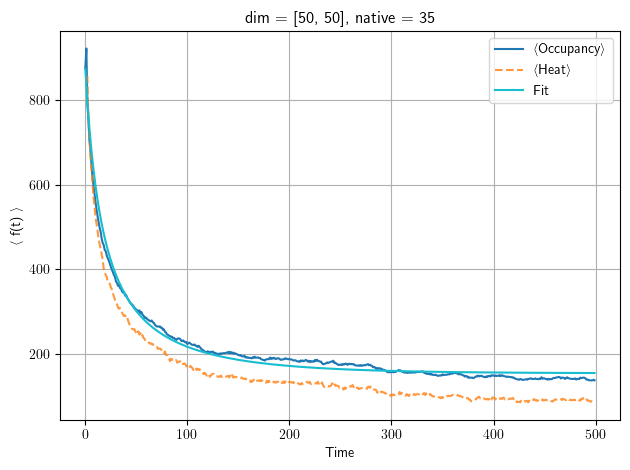

Plot Saved!
We get K = 164.07416612275435, with error = 2.354623725528558
We get r = 0.018945744160438316, with error = 0.0007097557902605615


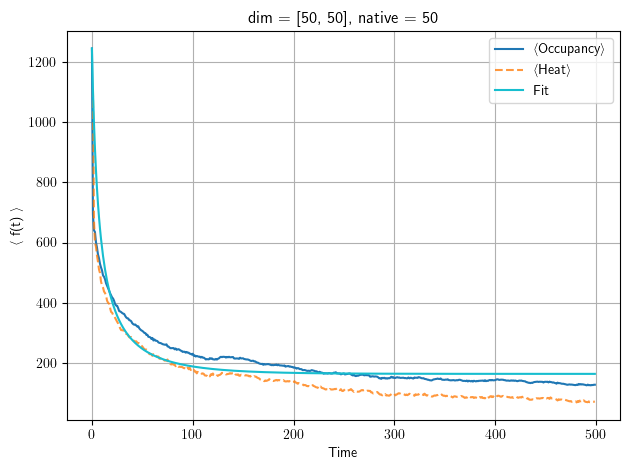

Plot Saved!
We get K = 192.15209171478406, with error = 1.7723584805421946
We get r = 0.29461249385951926, with error = 0.02717516837748366


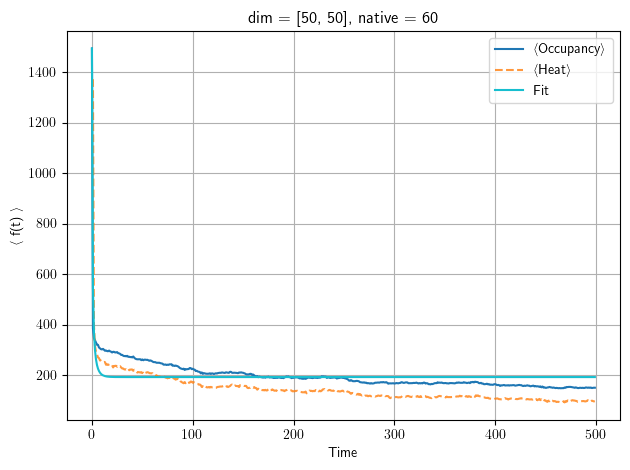

Plot Saved!
[50, 50]


In [2]:
# dim = 50
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import ast
from scipy.optimize import curve_fit

# Logistic regression of populations
def f2(x, K, r):
    x0 = df_res['occupancy'].iloc[0]
    return (K*x0*np.exp(r*x))/(K+x0*(np.exp(x*r)-1))

f2v = np.vectorize(f2)

def consecutive(data, stepsize=1):    
    return np.split(data, np.where(np.diff(data) != stepsize)[0]+1)

folder_name = 'data_old/'
all_dim = [[i, i] for i in [50]]    
all_seed = list(range(100, 150)) 
all_native = [35, 50, 60]
graph = True
iterations = 500
list_iterations = list(range(iterations))      # This is useful when decomposing the dataframe

patterns = ['block', 'bee_hive', 'loaf', 'boat', 'tub', 'blinker', 'toad', 'beacon', 'pulsar', 'glider']
others = ['heat', 'occupancy']
columns = patterns + others

# Analysis of occupancies and heats

for dim in all_dim:
    for native in all_native:
        df = pd.DataFrame(columns=columns)
        for seed in all_seed:
            file_name = folder_name+str(dim[0])+"_"+str(dim[1])+"/"+str(native)+"_"+str(seed)+'.csv'
            if os.path.isfile(file_name):
                df_tmp = pd.read_csv(file_name, sep=';', skiprows=[0], names=columns, header=None)
                for col in df_tmp.columns:
                    df_tmp[col] = df_tmp[col].apply(lambda x: ast.literal_eval(str(x)))
                df = pd.concat([df, df_tmp], ignore_index=True)
        
        n = len(all_seed)
        df_per_native = df[others]
        df_res = pd.DataFrame([((lambda z: df_per_native.loc[z:df.shape[0]:iterations])(z)).mean() for z in list_iterations])     # In this way we average on same time for different seeds
        if graph:
            popt, pcov = curve_fit(f2, list_iterations, df_res['occupancy'])
            print(f"We get K = {popt[0]}, with error = {np.sqrt(pcov[0][0])}")
            print(f"We get r = {popt[1]}, with error = {np.sqrt(pcov[1][1])}")
            plt.rcParams['text.usetex'] = True
            plt.title(f"dim = {dim}, native = {native}")
            plt.plot(df_res['occupancy'], label=r'$\langle$Occupancy$\rangle$', color='tab:blue')
            K.append(popt[0])
            K_err.append(np.sqrt(pcov[0][0]))
            r.append(popt[1])
            r_err.append(np.sqrt(pcov[1][1]))
            plt.plot(list_iterations[1:], df_res['heat'].iloc[1:], label=r'$\langle$Heat$\rangle$', ls='--', alpha=0.8, color='tab:orange')
            plt.plot(f2v(list_iterations, popt[0], popt[1]), label='Fit', color='tab:cyan')
            plt.xlabel('Time')
            plt.ylabel(r'$\langle$ f(t) $\rangle$')
            plt.legend(loc='best')
            plt.grid()
            plt.tight_layout()
            plt.savefig('plot_native_fit/'+str(dim[0])+"_"+str(dim[1])+"/"+str(native)+'.png', bbox_inches='tight', dpi=300)
            plt.show()
            print("Plot Saved!")
    print(dim)

In [3]:
K = np.array(K)
K_err = np.array(K_err)
r = np.array(r)
r_err = np.array(r_err)
a = 1+r
x_star = r/(r+1)
x_star

array([0.00298604, 0.00270838, 0.00500513, 0.0093454 , 0.06820637,
       0.00437612, 0.00790659, 0.00954519, 0.0176114 , 0.17323257])

In [5]:
K, r

(array([ 5.79092545,  5.28243282,  7.02161493,  9.4352316 , 10.63597024,
        36.02084139, 49.58845175, 50.71536294, 58.38631872, 60.92119298]),
 array([0.00299498, 0.00271574, 0.0050303 , 0.00943356, 0.07319901,
        0.00439536, 0.0079696 , 0.00963718, 0.01792712, 0.20952998]))

In [6]:
a

array([1.00299498, 1.00271574, 1.0050303 , 1.00943356, 1.07319901,
       1.00439536, 1.0079696 , 1.00963718, 1.01792712, 1.20952998])

In [18]:
x_star*np.array([225]*5 + [900]*5 )#+ [50*50]*3)

array([  0.67185865,   0.60938592,   1.12615355,   2.1027142 ,
        15.34643302,   3.93851203,   7.11593182,   8.59067276,
        15.85026137, 155.90931038])